<a href="https://colab.research.google.com/github/GubioGL/Feixes-pacialmente-coerentes/blob/main/Codigo_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#!pip install LightPipes[pyfftw]
from LightPipes import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


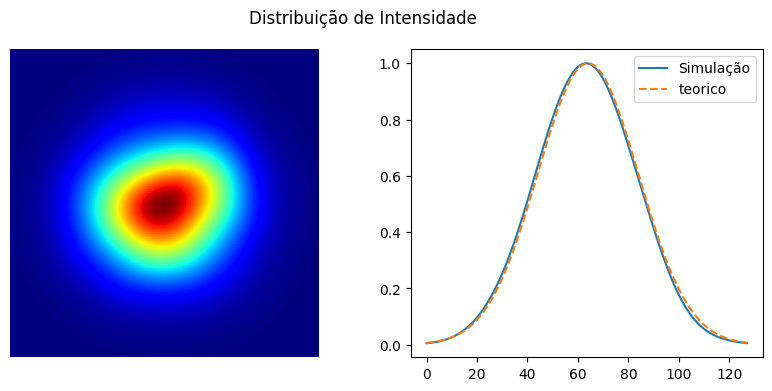

In [37]:
lambd = 620*nm;
sigma = .2*mm; # cintura do feixe
delta = .2*mm; # coherence length

N  = 2**7;
dx = 10*um;
x  = np.arange(-N/2,N/2,1)*dx;
[xx,yy] = np.meshgrid(x,x);

L = 300; # Número da soma incorente
L_nm = 25; # #Numero da soma corente

#-------------------------------------
v_x = np.linspace(-1,1,L_nm)*np.sqrt(2)/(np.pi*delta )
pseudos_modos = np.exp(1j*np.zeros((N,N,L)))

# Soma incoerente
for ii in range(0,L):

    # Soma coerente
    u = np.zeros_like(xx);
    for j in v_x: # v_n
        for i in v_x:# v_m
            p_nm = np.exp( - ( j**2 + i**2 )*( np.pi*delta )**2)
            H    = np.exp(- ( xx**2 + yy**2 )/(2*sigma )**2
                      + 2j*np.pi*( xx*j + yy*i ))
            random_phase = np.exp(- 2j*np.pi*np.random.random(1) )

            campo = (np.sqrt( 2*np.pi )*delta )*p_nm*H*random_phase
            u = u + campo

    # Salavando e normalization
    pseudos_modos[:,:,ii] = u/u.max();


#### Visualizando a intensidade do feixe #######
# Expressão teorica para comparar
teorico = np.exp(-x**2/(2*sigma**2) )

u = np.sum(abs(pseudos_modos**2),2) # Intensidade
u = u/u.max() # Normalizando

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
fig.suptitle('Distribuição de Intensidade')

ax1.imshow(u,cmap="jet")
ax1.set_axis_off()

ax2.plot(u[N//2,:],label="Simulação")
ax2.plot(teorico,"--" ,label="teorico")
plt.legend()
plt.show()